In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

In [5]:
df = pd.read_csv('../Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
# HasCrCard, IsActiveMember: int / EstimatedSalary: float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
# null 값 없음
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
# 최소 0 & 최대 1 -> HasCrCard, IsActiveMember 0 & 1로 이루어진 데이터
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


---
### HasCrCard

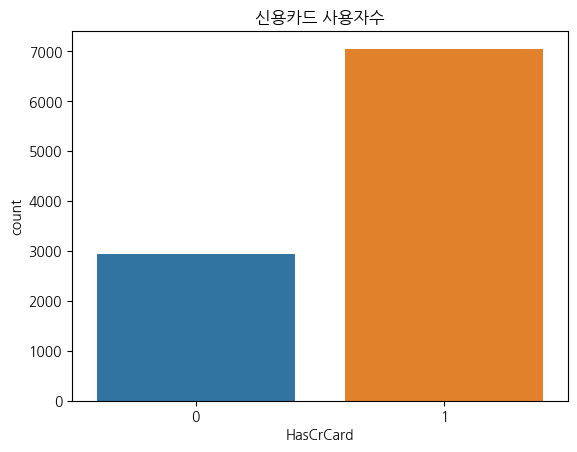

In [33]:
# 신용카드 사용자 수 -> 3:7 정도
plt.title('신용카드 사용자수')
sns.countplot(x='HasCrCard', data=df)
plt.show()

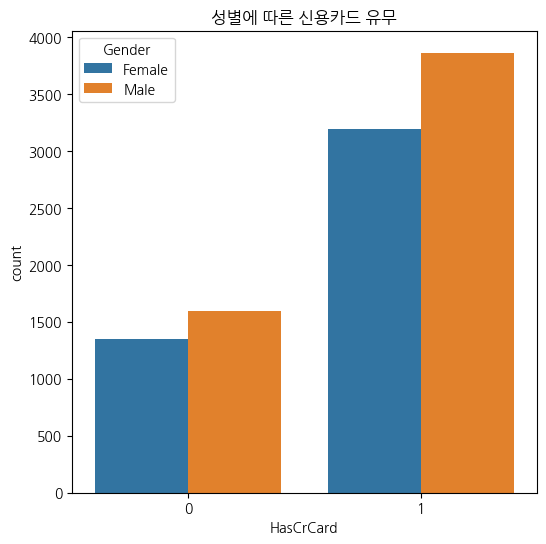

In [10]:
# 성별에 따른 신용카드 유무
plt.figure(figsize=(6,6))
plt.title('성별에 따른 신용카드 유무')
sns.countplot(x='HasCrCard', data=df, hue='Gender')
plt.show()

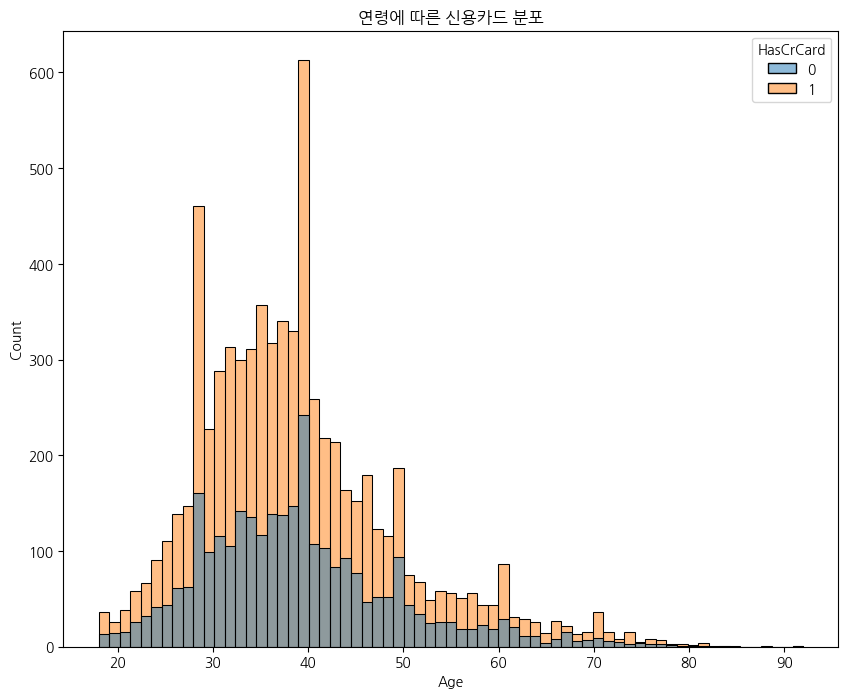

In [11]:
# 연령에 따른 신용카드 사용자 분포
plt.figure(figsize=(10,8))
plt.title('연령에 따른 신용카드 분포')
sns.histplot(x='Age', data=df, hue='HasCrCard')
plt.show()

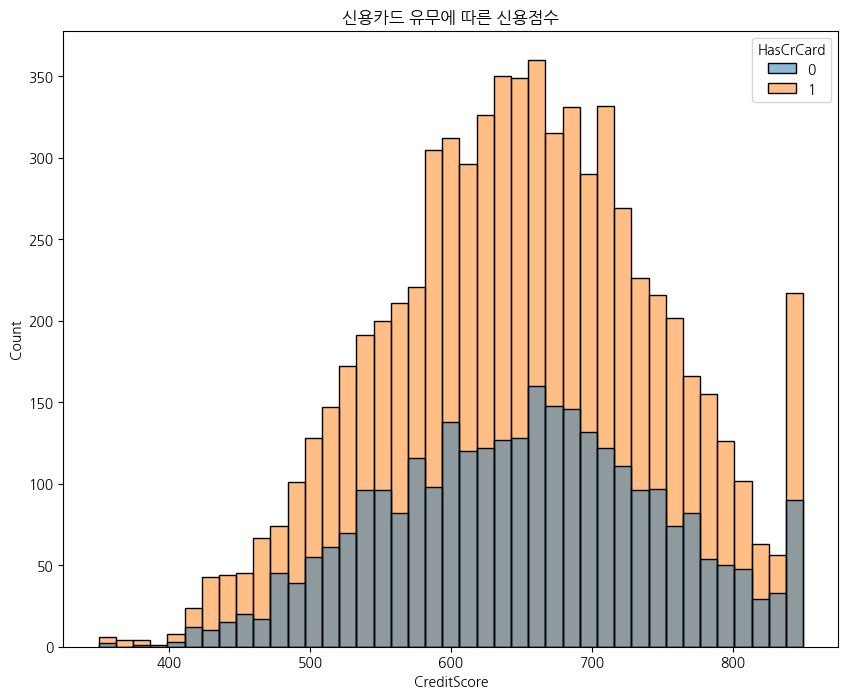

In [12]:
# 신용카드 유무에 따른 신용점수
plt.figure(figsize=(10,8))
plt.title('신용카드 유무에 따른 신용점수')
sns.histplot(x='CreditScore', data=df, hue='HasCrCard')
plt.show()

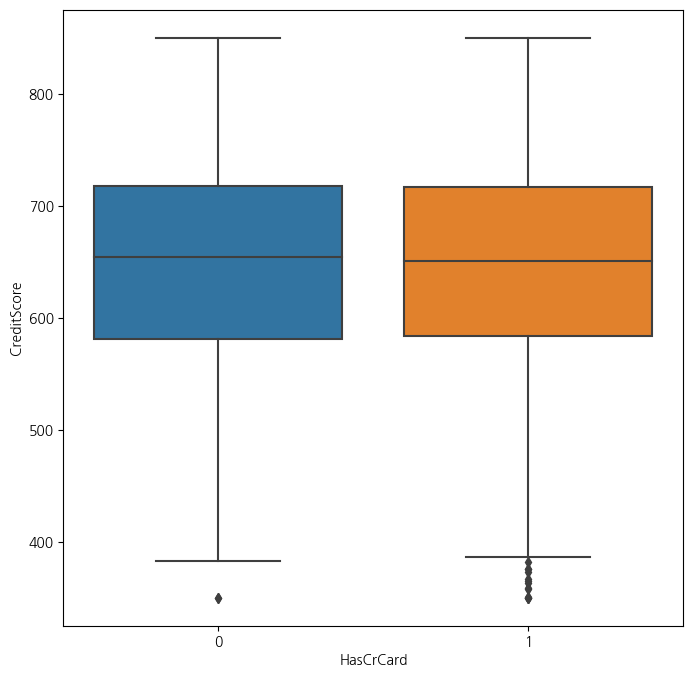

In [13]:
# 신용카드 유무에 따른 신용점수 boxplot
plt.figure(figsize=(8,8))
sns.boxplot(x='HasCrCard', y='CreditScore', data=df)
plt.show()

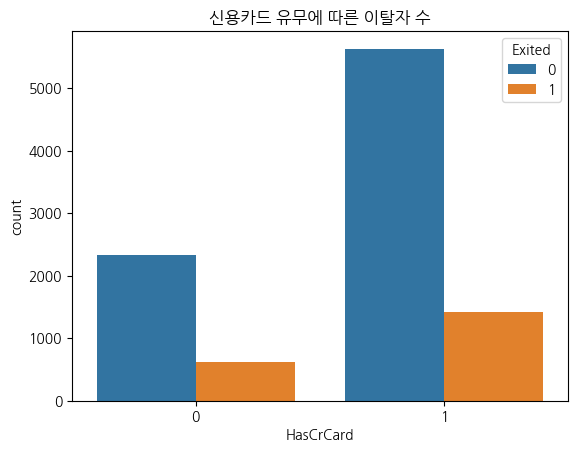

In [34]:
# 신용카드 유무에 따른 이탈자 수 -> 신용카드를 가지고 있는데 이탈?
plt.title('신용카드 유무에 따른 이탈자 수')
sns.countplot(x='HasCrCard', data=df, hue='Exited')
plt.show()

- 신용카드를 가지고 있는데 이탈하는 고객 존재

---
### IsActiveMember

- 비활성, 활성고객 비슷한 비율

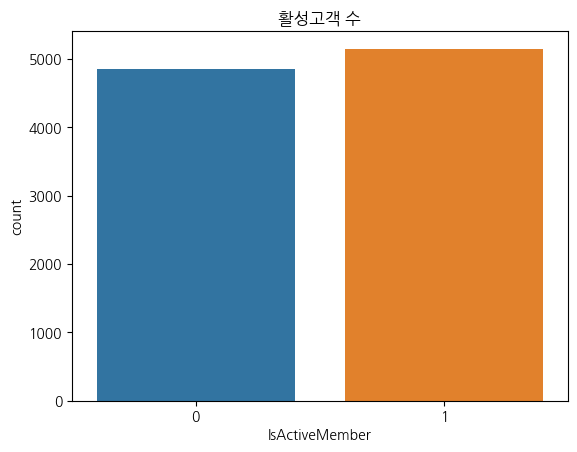

In [35]:
# 활성고객수 파악 -> 비슷한 수준
plt.title('활성고객 수')
sns.countplot(x='IsActiveMember', data=df)
plt.show()

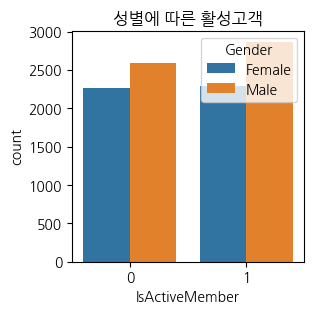

In [29]:
# 성별에 따른 활성고객
plt.figure(figsize=(3,3))
plt.title('성별에 따른 활성고객')
sns.countplot(x='IsActiveMember', data=df, hue='Gender')
plt.show()

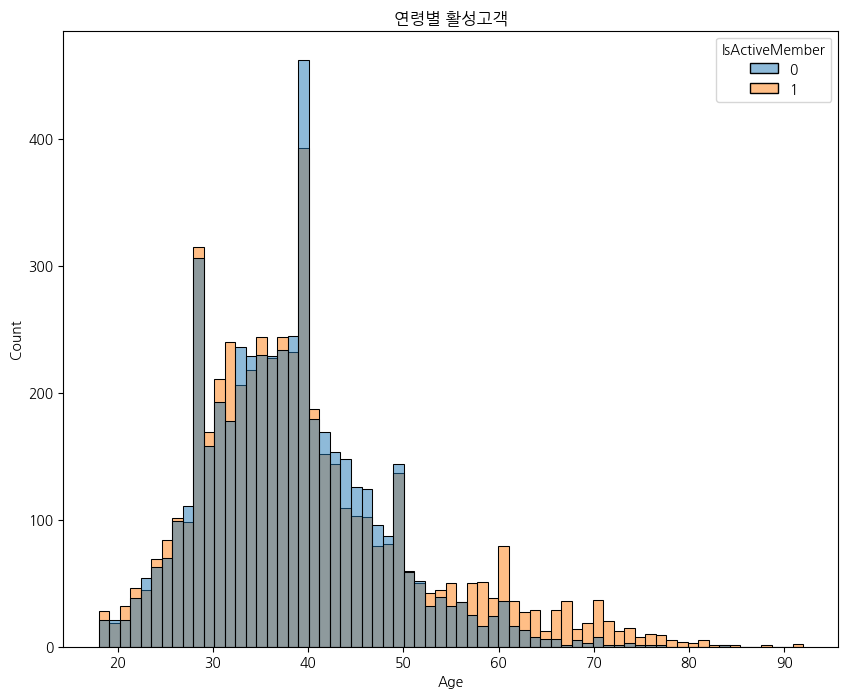

In [17]:
plt.figure(figsize=(10,8))
plt.title('연령별 활성고객')
sns.histplot(x='Age', data=df, hue='IsActiveMember')
plt.show()

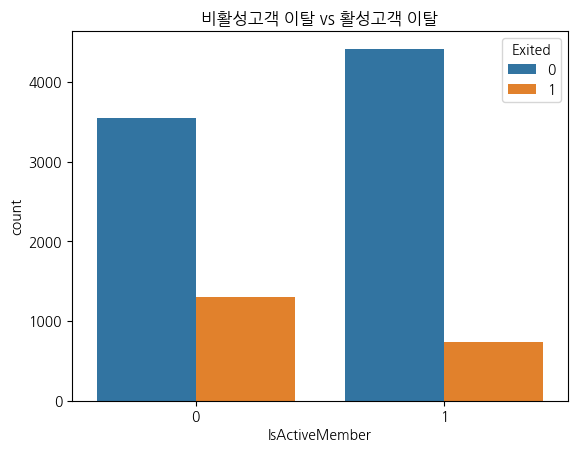

In [36]:
# 활성고객과 이탈 연관성
plt.title('비활성고객 이탈 vs 활성고객 이탈')
sns.countplot(x='IsActiveMember', data=df, hue='Exited')
plt.show()

- 활성고객의 이탈자 비율이 낮은편

---
### EstimatedSalary

- 이상치가 존재할 것이라고 예상했으나, 이상치 존재 x

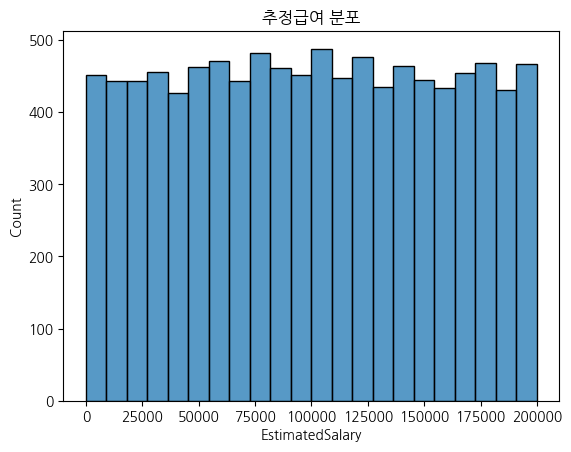

In [37]:
# 추정급여 분포
plt.title('추정급여 분포')
sns.histplot(x='EstimatedSalary', data=df)
plt.show()

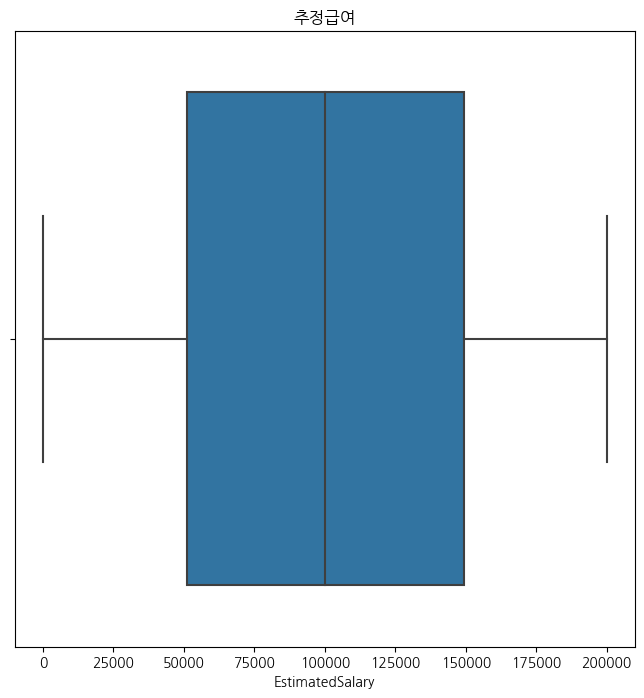

In [20]:
# 추청급여 boxplot
plt.figure(figsize=(8,8))
plt.title('추정급여')
sns.boxplot(x=df['EstimatedSalary'])
plt.show()

- 남성의 급여가 높음

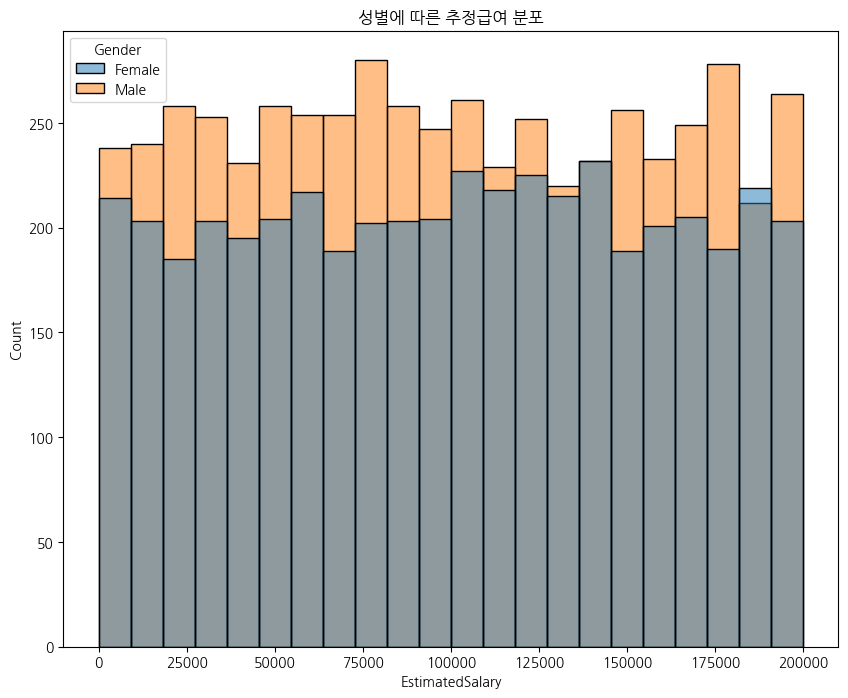

In [21]:
# 성별에 따른 추정급여 분포
plt.figure(figsize=(10,8))
plt.title('성별에 따른 추정급여 분포')
sns.histplot(x='EstimatedSalary', data=df, hue='Gender')
plt.show()

In [22]:
data = df.groupby('Age')[['Balance','EstimatedSalary']].mean().reset_index()
data.head()

,Age,Balance,EstimatedSalary
0,18,79169.57500,85102.389545
1,19,70502.53963,97734.100370
2,20,76038.89000,97705.542000
3,21,75926.88283,102536.673774
4,22,68213.74881,98321.615476


- 잔액과 급여의 비례관계는 확인했으나, 연령에 따라 증가 x

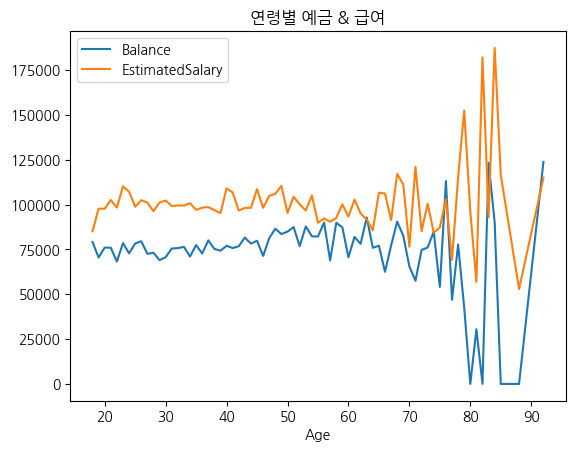

In [38]:
plt.plot('Age', 'Balance', data=data)
plt.plot('Age', 'EstimatedSalary', data=data)
plt.title('연령별 예금 & 급여')
plt.xlabel('Age')
plt.legend()
plt.show()

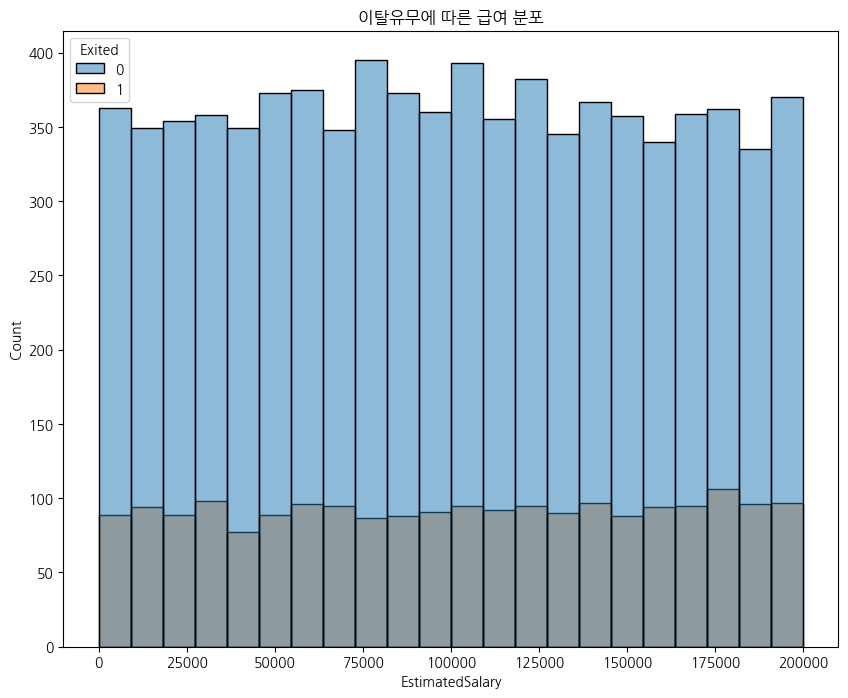

In [24]:
# 추정급여 분포 & 이탈
plt.figure(figsize=(10,8))
plt.title('이탈유무에 따른 급여 분포')
sns.histplot(x='EstimatedSalary', data=df, hue='Exited')
plt.show()

- 이탈 유무에 따른 급여 분포가 차이가 없음

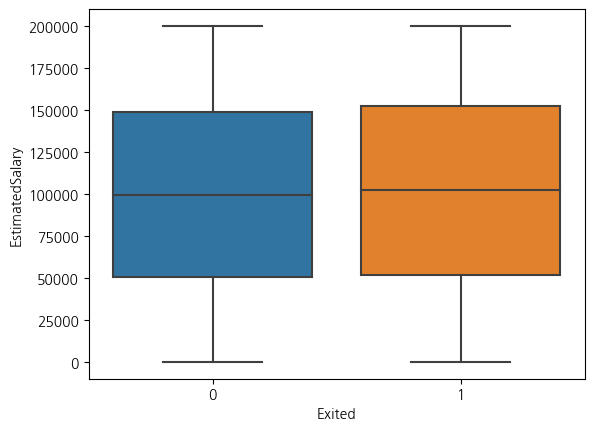

In [39]:
# 추청급여 & 이탈 boxplot
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()

---

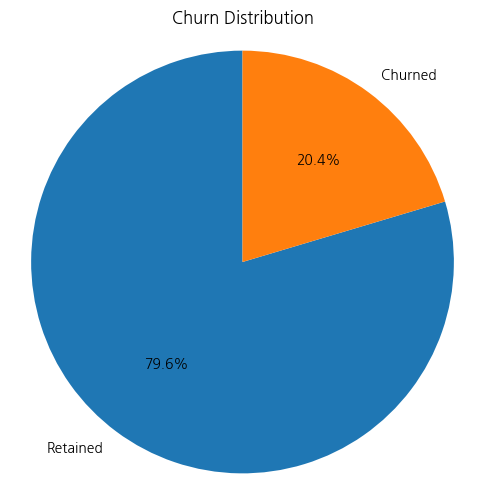

In [26]:
# Churn distribution
plt.figure(figsize=(6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()